In [2]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


In [3]:
import tensorflow as tf
x = tf.Variable(5.0) # Trainable variable
with tf.GradientTape() as tape:
  y = x ** 2 # y = x^2
grad = tape.gradient(y, x) # Computes dy/dx automatically
print(grad.numpy()) # Output: 10.0

10.0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
from PIL import Image
import os
import numpy as np

# Path to the dataset folder
dataset_path = "/content/drive/MyDrive/AI and ML/DevanagariHandwrittenDigitDataset/Train"

# Placeholder for images and labels
images = []
labels = []

# Iterate through each folder and file
for label_folder in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, label_folder)
    if os.path.isdir(folder_path):  # Ensure it’s a directory
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_name.endswith('.png'):  # Assuming images are PNG files
                # Open and process image
                image = Image.open(file_path).convert('L')  # Convert to grayscale
                image_array = np.array(image)  # Convert to numpy array
                images.append(image_array)
                labels.append(label_folder)  # Use folder name as label

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

print(f"Loaded {len(images)} images with labels.")


Loaded 17010 images with labels.


In [7]:
from PIL import Image
import os
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

# Function to load, process, and normalize images
def load_images_and_labels(folder_path, target_size=(28, 28)):
    images = []
    labels = []
    label_mapping = {}  # To map folder names to numerical labels
    current_label = 0

    # Iterate through folders (each folder represents a class)
    for label_folder in sorted(os.listdir(folder_path)):  # Ensure consistent label order
        label_path = os.path.join(folder_path, label_folder)
        if os.path.isdir(label_path):
            # Map folder name to a numerical label
            if label_folder not in label_mapping:
                label_mapping[label_folder] = current_label
                current_label += 1

            for file_name in os.listdir(label_path):
                file_path = os.path.join(label_path, file_name)
                if file_name.endswith('.png'):  # Check for PNG files
                    # Load image, resize to target size, and convert to grayscale
                    image = Image.open(file_path).convert('L').resize(target_size)
                    image_array = np.array(image, dtype=np.float32)  # Convert to NumPy array
                    image_array /= 255.0  # Normalize to range 0-1
                    images.append(image_array)
                    labels.append(label_mapping[label_folder])  # Assign numerical label

    # Convert to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_mapping

# Paths to the train and test folders
train_folder = "/content/drive/MyDrive/AI and ML/DevanagariHandwrittenDigitDataset/Train"
test_folder = "/content/drive/MyDrive/AI and ML/DevanagariHandwrittenDigitDataset/Test"

# Load and process training and testing data
train_images, train_labels, label_mapping = load_images_and_labels(train_folder)
test_images, test_labels, _ = load_images_and_labels(test_folder)

# ✅ Shuffle after loading!
train_images, train_labels = shuffle(train_images, train_labels, random_state=42)

# One-hot encode the labels for multi-class classification
train_labels = to_categorical(train_labels, num_classes=len(label_mapping))
test_labels = to_categorical(test_labels, num_classes=len(label_mapping))

# Confirm everything looks good
print(f"Training set: {train_images.shape[0]} images, {train_labels.shape[0]} labels.")
print(f"Testing set: {test_images.shape[0]} images, {test_labels.shape[0]} labels.")
print(f"Label Mapping: {label_mapping}")
print(os.listdir(train_folder))


Training set: 17010 images, 17010 labels.
Testing set: 3020 images, 3020 labels.
Label Mapping: {'digit_0': 0, 'digit_1': 1, 'digit_2': 2, 'digit_3': 3, 'digit_4': 4, 'digit_5': 5, 'digit_6': 6, 'digit_7': 7, 'digit_8': 8, 'digit_9': 9}
['digit_3', 'digit_6', 'digit_2', 'digit_9', 'digit_5', 'digit_0', 'digit_8', 'digit_4', 'digit_7', 'digit_1']


Task 2: Build the FCN Model
Model Architecture
• Create a Sequential model using Keras.
• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
softmax activation function.

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Initialize the Sequential model
model = Sequential()

print("Sequential model initialized.")


Sequential model initialized.


In [9]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

.


.


Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [11]:
from tensorflow.keras.optimizers import Adam

# Compile the previously built model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


print("Model compiled successfully.")


Model compiled successfully.


In [12]:
print(f"Shape of train_images: {train_images.shape}")
print(f"Shape of train_labels: {train_labels.shape}")


Shape of train_images: (17010, 28, 28)
Shape of train_labels: (17010, 10)


Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model and avoiding overfitting.

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Set up callbacks
checkpoint = ModelCheckpoint("best_model.h5", monitor="val_loss", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
callbacks = [checkpoint, early_stopping]

# Train the model
history = model.fit(
    train_images, train_labels,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping]
)

# Print summary
print(model.summary())

Epoch 1/20
100/107 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6735 - loss: 1.0595

107/107 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6854 - loss: 1.0211 - val_accuracy: 0.9474 - val_loss: 0.1825
Epoch 2/20
104/107 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9524 - loss: 0.1571

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9525 - loss: 0.1566 - val_accuracy: 0.9621 - val_loss: 0.1340
Epoch 3/20
103/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9734 - loss: 0.0912

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9732 - loss: 0.0914 - val_accuracy: 0.9697 - val_loss: 0.1063
Epoch 4/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9836 - loss: 0.0567

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9835 - loss: 0.0568 - val_accuracy: 0.9738 - val_loss: 0.0944
Epoch 5/20
106/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9854 - loss: 0.0474

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9854 - loss: 0.0474 - val_accuracy: 0.9753 - val_loss: 0.0918
Epoch 6/20
 99/107 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9904 - loss: 0.0360

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9904 - loss: 0.0357 - val_accuracy: 0.9785 - val_loss: 0.0773
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9932 - loss: 0.0259 - val_accuracy: 0.9809 - val_loss: 0.0777
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9782 - val_loss: 0.0862
Epoch 9/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9957 - loss: 0.0181 - val_accuracy: 0.9806 - val_loss: 0.0804


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,464 (1.08 MB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 188,310 (735.59 KB)

None


In [14]:
test_loss, test_acc = model.evaluate(train_images, train_labels, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")


532/532 - 1s - 2ms/step - accuracy: 0.9919 - loss: 0.0311
Test accuracy: 0.9919


In [15]:
# Save model as .h5 file
model.save("devanagari_model.h5")
print("Model saved as devanagari_model.h5")


Model saved as devanagari_model.h5


In [16]:
from tensorflow.keras.models import load_model

# Load the .h5 model
model = load_model("devanagari_model.h5")
print("Model loaded from devanagari_model.h5")

Model loaded from devanagari_model.h5


In [17]:
# Use the model to make predictions on the test set
predictions = model.predict(train_images)

# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)

# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(train_labels[0])}")

532/532 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted label for first image: 2
True label for first image: 2


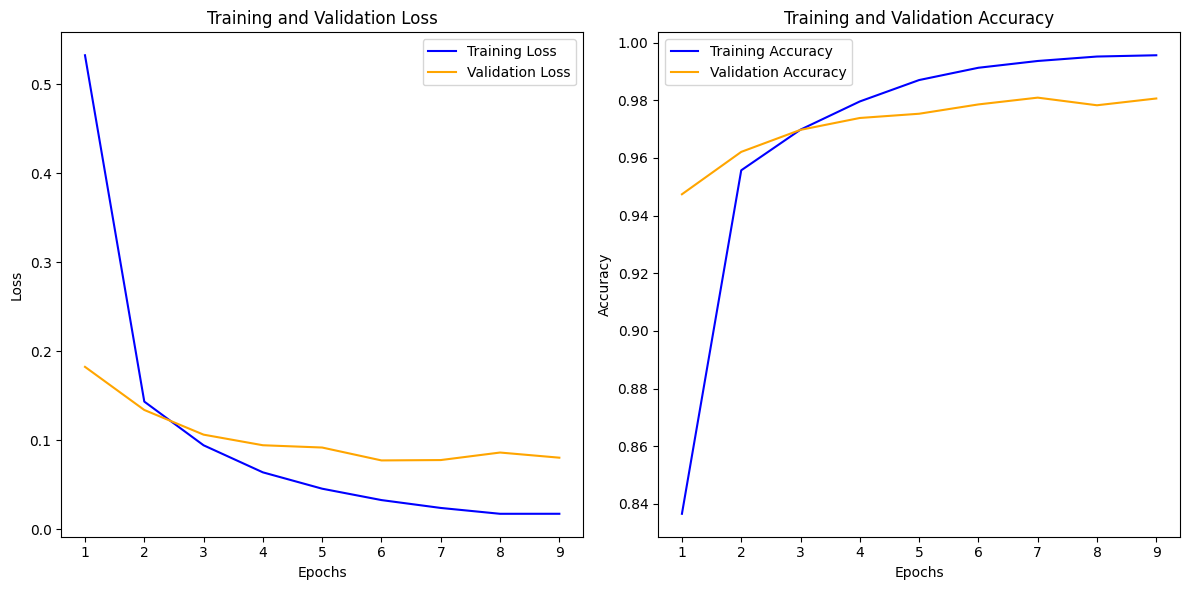

In [18]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()